In [1]:
%matplotlib inline
import sys
sys.path.append('Q:\\python\\lib')
import matplotlib.pyplot as plt
from pyfield import *
from window import *
import rotB
import numpy as np

if __name__ == "__main__":
    dim = (64,64,32)
    
    mg = np.mgrid[0:dim[0],0:dim[1]]
    
    h = 1.5
    data = (np.exp(-(mg[0]-dim[0]*0.35)**2./2/h**2 - (mg[1]-dim[1]/2)**2./2/h**2) - 
            np.exp(-(mg[0]-dim[0]*0.65)**2./2/h**2 - (mg[1]-dim[1]/2)**2./2/h**2))

    
    idx = np.indices(dim).astype(np.float32)  
    X = np.zeros(dim+(4,), dtype = np.float32)
    X[:,:,:,0] = idx[0,:,:,:] - dim[0]/2
    X[:,:,:,1] = idx[1,:,:,:] - dim[1]/2
    X[:,:,:,2] = idx[2,:,:,:] - dim[2]/2
    X[:,:,:,3] = 1.
    
    for i in range(0,dim[2]):
        X[:,:,i,1] -= dim[0]/16.*np.sin(X[:,:,i,0]/(dim[0]/2)*np.pi)*np.exp(-i/(dim[2]/4.))
    
    B = np.zeros(dim+(4,), dtype = np.float32)
    B1 = np.gradient(-PField(data, dim[2]))    
    B[:,:,:,0] = B1[0]
    B[:,:,:,1] = B1[1]
    B[:,:,:,2] = B1[2]
    
    cle = rotB.Integrator(X, B)
    cle.start()
    
    #window(cle, video_dir = '/video')


In [ ]:
cle.stop()

<h2>Lagrangian approach ($Craig \& Sneid, ApJ1986$):

<p>$x = x(X, t)$, $x(X,0) = X$

$\delta x_i = \sum_\alpha \frac{\partial x_a}{\partial X_\alpha} \delta X_\alpha$

$B_i = \frac{1}{\Delta}\sum_\alpha \frac{\partial x_a}{\partial X_\alpha} B_{0\alpha}$, 
$\Delta = \frac{\partial(x_1, x_2, x_3)}{\partial(X_1, X_2, X_3)}$</p>

$\nabla \cdot B \equiv 0$!

MHD relaxation method:

<p>$\frac{Dx_i}{Dt} \sim F_i = (j \times B)_i$, $j = \nabla \times B$


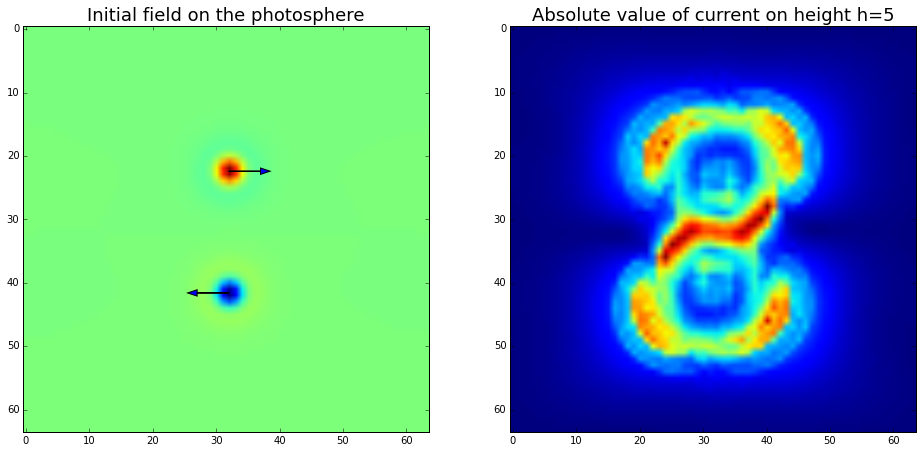

In [74]:
plt.figure(figsize=(16,8))

#plt.imshow(cle._Current[:,:,5,0])
plt.subplot(121)
plt.title('Initial field on the photosphere', size = 18)
plt.imshow(B[:,:,0,2])
plt.arrow(dim[1]*0.5,dim[0]*0.35,5,0, head_width = 1)
plt.arrow(dim[1]*0.5,dim[0]*0.65,-5,0, head_width = 1)
plt.subplot(122)
plt.title('Absolute value of current on height h=5', size = 18)
plt.imshow(np.sqrt(np.sum(cle._Current[:,:,5,:]**2,axis=2)))
#plt.quiver(cle._Current[:,:,5,0], cle._Current[:,:,5,1])